In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
#linear regression single variable

In [6]:
df=pd.read_excel('housing.xlsx')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [7]:
#give the home prices find out prices of home whose area is 3300sq ft, 5000 sq feet

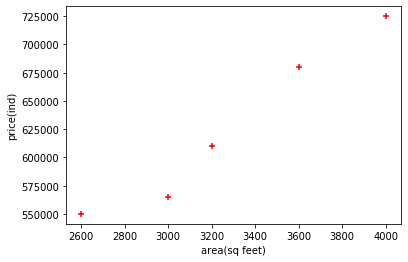

In [8]:
%matplotlib inline
plt.xlabel('area(sq feet)')
plt.ylabel('price(ind)')
plt.scatter(df.area, df.price, color='red', marker="+")

In [9]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
reg.predict(np.array((3300)).reshape(-1,1))

array([628715.75342466])

In [11]:
reg.coef_

array([135.78767123])

In [12]:
reg.intercept_

180616.43835616432

In [13]:
#y=m*x+b
135.78767123*3300+180616.43835616432

628715.7534151643

In [14]:
reg.predict(np.array((5000)).reshape(-1,1))

array([859554.79452055])

In [15]:
135.78767123*5000+180616.43835616432

859554.7945061643

In [16]:
reg.predict(np.array((4000)).reshape(-1,1))

array([723767.12328767])

In [18]:
d=pd.DataFrame({
    'area':[5000,1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100]
})
d.head()

,area
0,5000
1,1000
2,1500
3,2300
4,3540


In [20]:
p=reg.predict(d)
p

array([ 859554.79452055,  316404.10958904,  384297.94520548,
        492928.08219178,  661304.79452055,  740061.64383562,
        799808.21917808,  926090.75342466,  650441.78082192,
        825607.87671233,  492928.08219178, 1402705.47945205,
       1348390.4109589 , 1144708.90410959])

In [21]:
d['prices']=p

In [22]:
d.head()

,area,prices
0,5000,859554.794521
1,1000,316404.109589
2,1500,384297.945205
3,2300,492928.082192
4,3540,661304.794521


In [23]:
d.to_csv('predication', index=False)

In [24]:
p=pd.read_csv('predication')
p.head()

,area,prices
0,5000,859554.794521
1,1000,316404.109589
2,1500,384297.945205
3,2300,492928.082192
4,3540,661304.794521


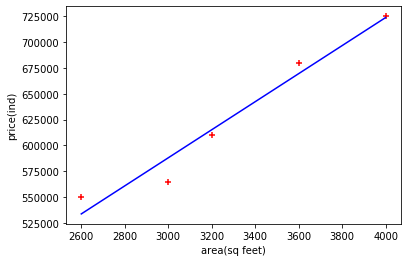

In [25]:
%matplotlib inline
plt.xlabel('area(sq feet)')
plt.ylabel('price(ind)')
plt.scatter(df.area, df.price, color='red', marker="+")
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [26]:
#Linear Regression Multiple Variable

In [27]:
# 3000 sqr ft area, 3 bedrooms, 40 years old
#2500 sqr ft area, 4 bedroom, 5 years old

In [28]:
# price= m1 * area + m2 * bedrooms + m3 * age + b ------(y= m1x1 + m2x2 + m3x3 +b)------m1, m2, m3 are coefficients, b is intercept
#x1,x2,x3 are independent variables(features), y is Dependent variable

In [29]:
df=pd.read_excel('housing 1.xlsx')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [30]:
df.bedrooms.median()

3.5

In [31]:
import math
median_bedrooms=math.floor(3.5)
median_bedrooms

3

In [32]:
import math
median_bedrooms=math.floor(df.bedrooms.median())
median_bedrooms

3

In [33]:
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [34]:
reg=linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [36]:
reg.intercept_

383724.9999999998

In [37]:
reg.predict([[3000, 3, 40]])

array([444400.])

In [38]:
#--(y= m1x1 + m2x2 + m3x3 +b)--
137.25*3000+-26025*3+-6825*40+383724.9999999998

444399.9999999998